# Data Munging

In [2]:
# Pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from scipy.stats.mstats import mode

In [3]:
# Reading Files
train_data = pd.read_csv("Data/train.csv")
test_data = pd.read_csv("Data/test.csv")

In [4]:
# Preview of Titanic
print "Train Head"
train_data.head()

Train Head


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Preview of Test
print "Test Head"
test_data.head()

Test Head


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
"""
Assuming no one drowns over their name, numbers on their ticket, 
and being arbritarily numbered by us after the fact, we assume 
we can take out some columns.
"""
# Titanic Data REMOVE: PassengerID, Name 
train_data.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
test_data.drop(['Name','Ticket'], axis = 1, inplace = True)

In [7]:
# The more important info of our data
print "Titanic Data"
train_data.info()
print "------------------------------"
print "Test Data"
test_data.info()

Titanic Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB
------------------------------
Test Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [8]:
"""
After looking we should also drop cabin because it is sparse. The majority of its elements are null.
"""
train_data.drop(['Cabin'], axis = 1, inplace = True)
test_data.drop(['Cabin'], axis = 1, inplace = True)

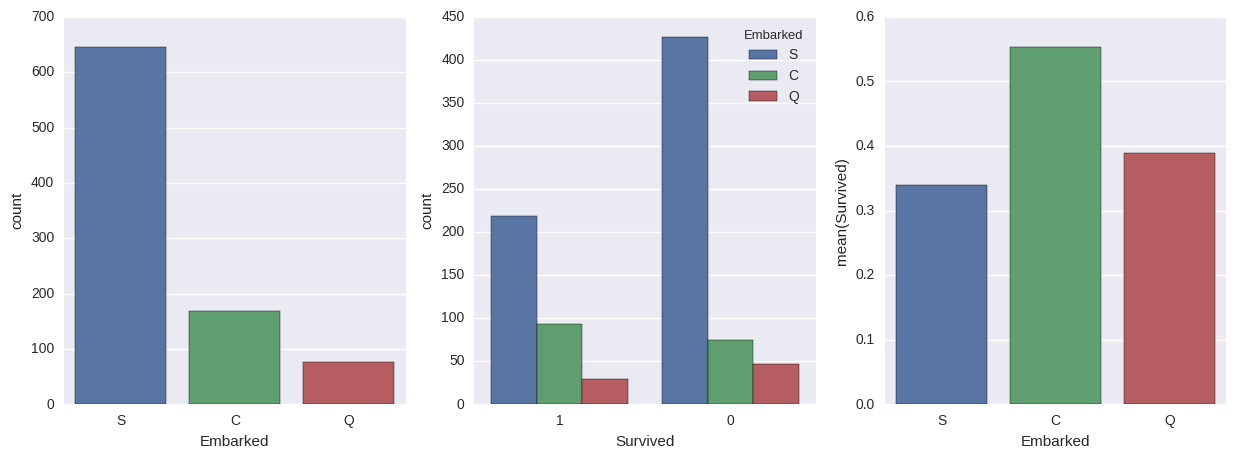

In [9]:
"""
1. Survival rates of people with types: S, C, Q
""" 

# Looks like Titanic is missing 2 values from a total of 891 in column Embarked
train_data["Embarked"].isnull().any().any()
train_data["Embarked"].mode()[0]
test_data["Embarked"].mode()[0]

# The most common val was 'S'. Let's replace the null values with 'S'.
train_data["Embarked"] = train_data["Embarked"].fillna('S')

# Seems like there are 3 types of people who embarked: S, C, Q
freq_embark  = train_data["Embarked"].value_counts()
freq_survive = train_data[["Embarked","Survived"]].groupby(["Survived"]).size()

# Lets find out the chances of survival for each different type
survive_perc = train_data[["Embarked","Survived"]].groupby(["Embarked"], as_index=False).mean()

# Plotting the results...
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Embarked', data = train_data, ax = axis1)
sns.countplot(x = 'Survived', data = train_data, hue = "Embarked", order = [1,0], ax = axis2)
sns.barplot  (x = 'Embarked', y = 'Survived', data = survive_perc, order = ['S','C','Q'], ax = axis3)

"""
Conclusion:

We notice that there were a lot of people of type S, medium in type C, lowest in type Q.

By the plots, we notice that if we were a person of type C, we would have a higher chance of surviving.
The second highest chance of survival is persons of type Q and lowest change is persons of type S.
"""
plt.show()

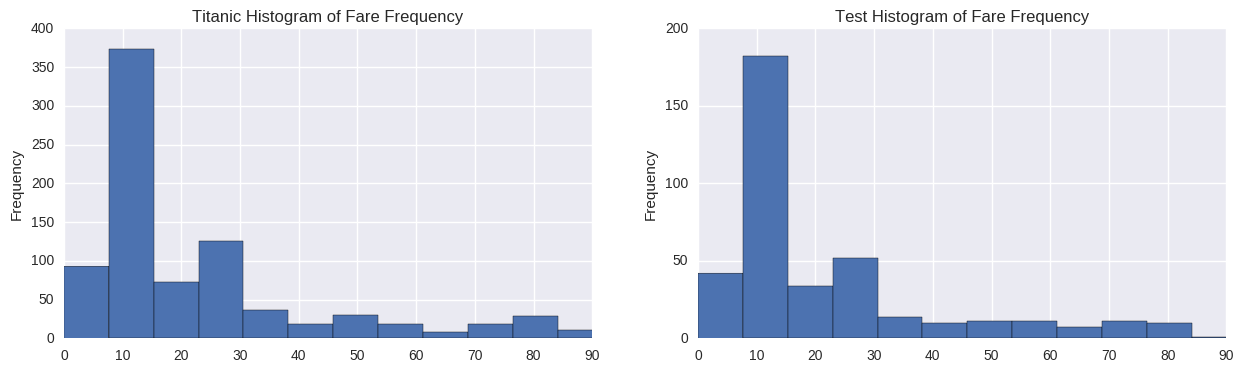

In [10]:
"""
2. Figuring out survial rate of people based on FARES
"""
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

# Looks like Test is missing 1 value from a total of 418 in column Fare
test_data["Fare"].isnull().any().any()
# An undisruptive value would be to input the mean of the Fares to the null value.
test_data["Fare"].fillna(test_data["Fare"].median(), inplace = True)

# Check out the histogram of Fare Frequency with bin 67 to give visual on group around 0.
axis1.set_title("Titanic Histogram of Fare Frequency")
axis2.set_title("Test Histogram of Fare Frequency")
train_data["Fare"].plot(kind = 'hist', bins = 67, xlim = (0,90),ax = axis1)
test_data["Fare"] .plot(kind = 'hist', bins = 67, xlim = (0,90),ax = axis2)


"""
Conclusion of section:

Average of those who didn't make it: $22.12 +-($31.39)
Average of those who survived it   : $48.40 +-($66.60)

data is too crazy
"""
plt.show()

In [11]:
"""
2.5 Logging the data (takes 1.5 minutes to run)
"""
train_data['LogFare'] = pd.Series()
test_data['LogFare']  = pd.Series()

for i,element in train_data["Fare"].iteritems():
    if element == 0:
        train_data['LogFare'][i] = 0
    else:
        train_data['LogFare'][i] = np.log(element)

for i,element in test_data["Fare"].iteritems():
    if element == 0:
        test_data['LogFare'][i] = 0
    else:
        test_data['LogFare'][i] = np.log(element)

/home/phay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/phay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/phay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/phay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a c

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked   LogFare
0         0       3    male  22.0      1      0   7.2500        S  1.981001
1         1       1  female  38.0      1      0  71.2833        C  4.266662
2         1       3  female  26.0      0      0   7.9250        S  2.070022
3         1       1  female  35.0      1      0  53.1000        S  3.972177
4         0       3    male  35.0      0      0   8.0500        S  2.085672
------------------


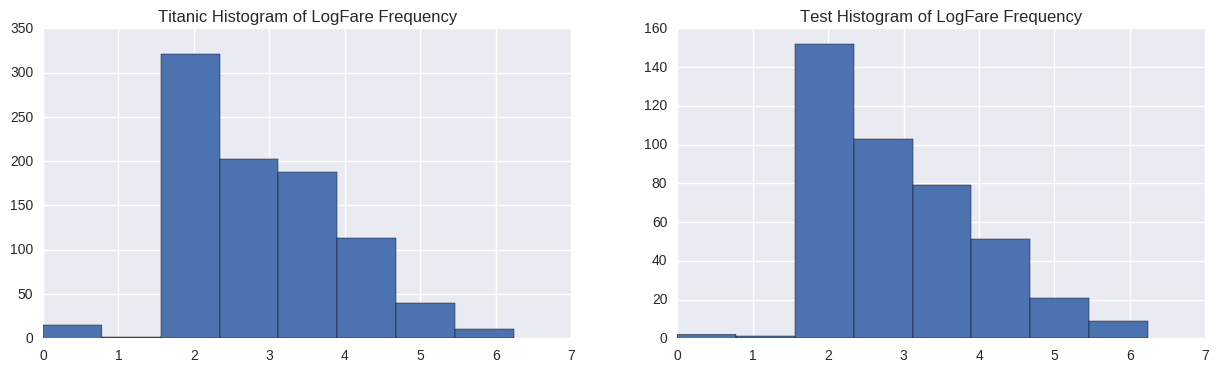

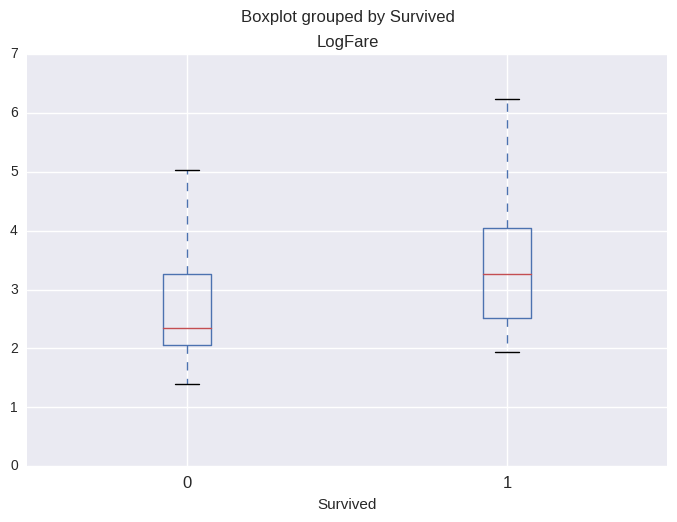

It seems you are more likely to survive if you paid more.


In [12]:
"""
2 CONT. Figuring out survial rate of people based on FARES
"""
# After Logging data 
fig, (axis3,axis4) = plt.subplots(1,2,figsize=(15,4))
axis3.set_title("Titanic Histogram of LogFare Frequency")
axis4.set_title("Test Histogram of LogFare Frequency")

print train_data.head()
print "------------------"

train_data["LogFare"].hist(bins = 8, ax = axis3)
test_data["LogFare"] .hist(bins = 8, ax = axis4)

train_data.boxplot(column = 'LogFare', by = 'Survived')

plt.show()

print "It seems you are more likely to survive if you paid more."

Average Age - Standard Deviation of Age > 0: True


/home/phay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/phay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


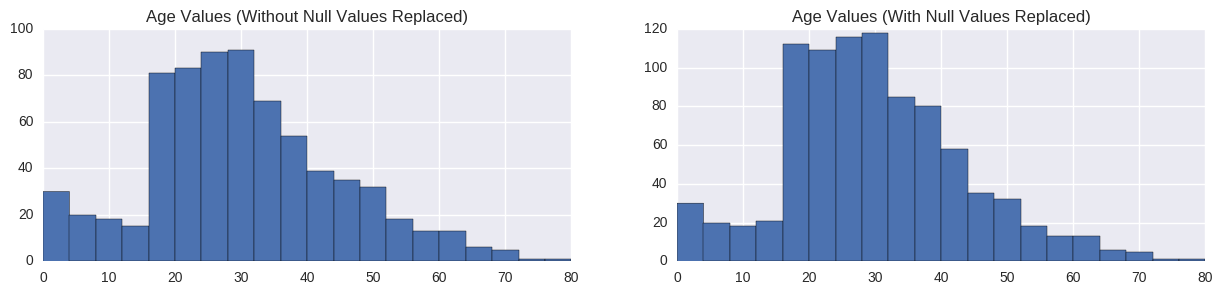

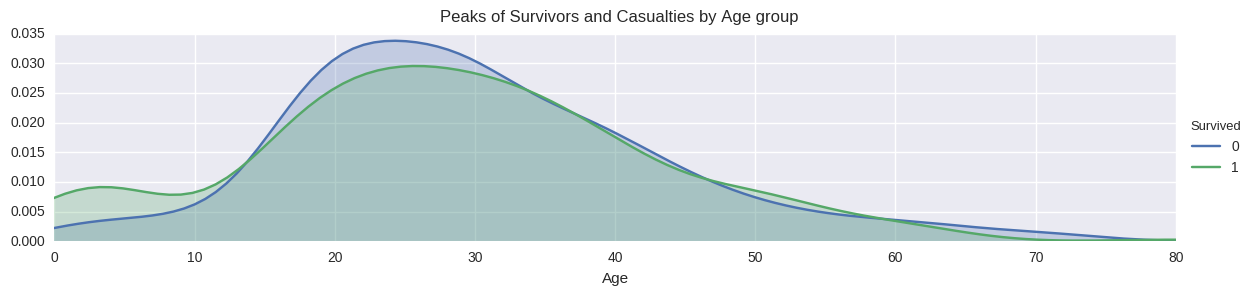

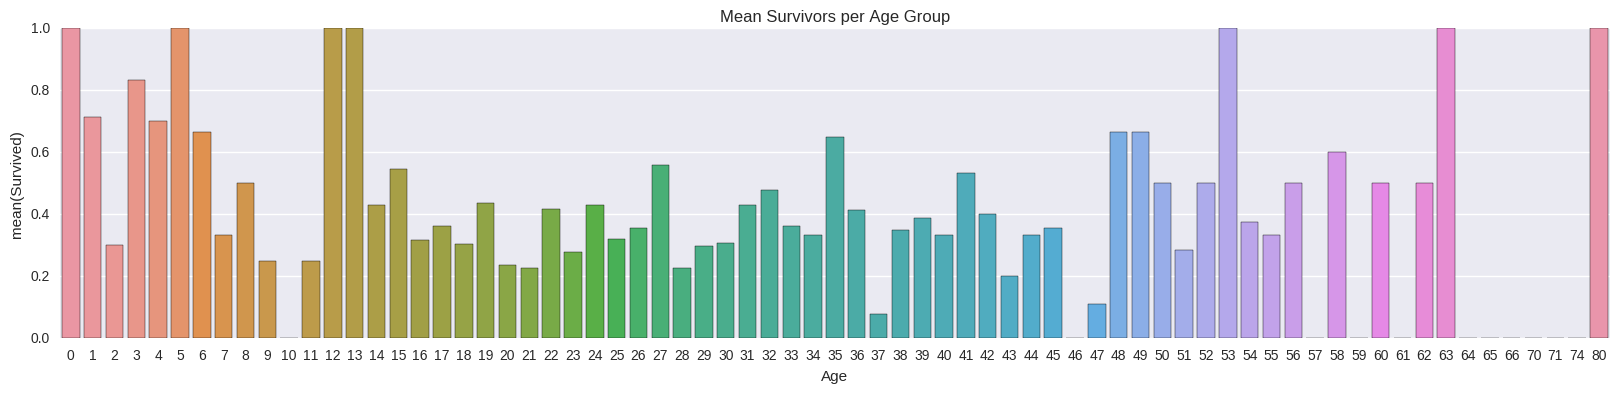

In [13]:
"""
This is figuring out survial rate of people based on AGE
"""

# There are 177 missing age values in Train and 86 in Test.
train_null_age = train_data["Age"].isnull().sum()
test_null_age    = test_data["Age"].isnull().sum()

train_average_age = train_data["Age"].mean()
train_stdev_age   = train_data["Age"].std()

test_average_age = test_data["Age"].mean()
test_stdev_age   = test_data["Age"].std()

# Since (Avg Age - Stdev Age > 0), we can use random numbers to generate the rest of the data we need.
print "Average Age - Standard Deviation of Age > 0:" , train_average_age - train_stdev_age > 0

# The range of these random numbers should be within the mean and standard deviation in order to be unbias
rand_1 = np.random.randint(train_average_age - train_stdev_age, train_average_age + train_stdev_age, \
                          size = train_null_age)
rand_2 = np.random.randint(test_average_age - test_stdev_age, test_average_age + test_stdev_age, \
                          size = test_null_age)

# Histogram of age values (without null values replaced)
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,3))
axis1.set_title("Age Values (Without Null Values Replaced)")
train_data["Age"].dropna().astype(int).hist(bins = 20, ax = axis1)

# Histogram of age values (with null values replaced)
axis2.set_title("Age Values (With Null Values Replaced)")
train_data["Age"][np.isnan(train_data["Age"])] = rand_1
test_data["Age"][np.isnan(test_data["Age"])]   = rand_2

train_data["Age"] = train_data["Age"].astype(int)
train_data["Age"].hist(bins = 20, ax = axis2)

# NOTE: 25 has a lot of occurances.

#---------------------------------
# Peaks for Survived and Casualties
face = sns.FacetGrid(train_data, hue = "Survived", aspect = 4)
face.map(sns.kdeplot, "Age", shade = True)
face.set(xlim = (0, train_data["Age"].max()))
face.add_legend()
plt.subplots_adjust(top = 0.9)
face.fig.suptitle("Peaks of Survivors and Casualties by Age group")

# Average Survived Passengers per age group.
fig, axis3 = plt.subplots(1,1, figsize = (20,4))
axis3.set_title("Mean Survivors per Age Group")
fig_average_age = train_data[["Age","Survived"]].groupby(["Age"], as_index = False).mean()
sns.barplot(x = "Age", y = "Survived", data = fig_average_age, ax = axis3)

#---------------------------------

"""
Conclusion:

As we can see from the graph, our chances of surviving, solely based on age, are a lot higher if we are 
less than 10 years of age. 
We see if we are older, we have a higher chance as well, but like children, they aren't able body enough
to do anything. However, it is still best to be less than 10.
This is because we see the bars are a lot higher for that age group for more occurances.

To really understand, we make sense of real life with this data. This makes sense with how we act as 
humans to save children first as an instinct. 
To make sense as to why it isn't higher, we can possibly think of one scenario of where people tried, 
but could not save a child or any number of accidents. 

NOTE: This is just at first glance and the head end ratio of the peaks
"""

sns.plt.show()

In [14]:
print train_data.apply(lambda x: x.isnull().sum() ,axis = 0)
print "-----------------------------------------------------------"
print test_data.apply(lambda x: x.isnull().sum() ,axis = 0)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
LogFare     0
dtype: int64
-----------------------------------------------------------
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
LogFare        0
dtype: int64


In [ ]:
"""
Machine Learning
"""

In [15]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [22]:
print test_data.head()
print train_data.head()

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked   LogFare
0          892       3    1  34.5      0      0   7.8292         1  2.057860
1          893       3    0  47.0      1      0   7.0000         2  1.945910
2          894       2    1  62.0      0      0   9.6875         1  2.270836
3          895       3    1  27.0      0      0   8.6625         2  2.159003
4          896       3    0  22.0      1      1  12.2875         2  2.508582
   Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked   LogFare
0         0       3    1   22      1      0   7.2500         2  1.981001
1         1       1    0   38      1      0  71.2833         0  4.266662
2         1       3    0   26      0      0   7.9250         2  2.070022
3         1       1    0   35      1      0  53.1000         2  3.972177
4         0       3    1   35      0      0   8.0500         2  2.085672


In [17]:
from sklearn.preprocessing import LabelEncoder

var_list = ['Sex','Embarked']
LE = LabelEncoder()


for var in var_list:
    test_data[var] = LE.fit_transform(test_data[var])
    train_data[var] = LE.fit_transform(train_data[var])
    
"""




"""
print

In [18]:
X_train = train_data.drop("Survived",axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId",axis=1).copy()

In [19]:
# Logistic Regression
logreg = LogisticRegression()

#fit model according to train data and relative to train
logreg.fit(X_train, Y_train)


Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.79236812570145898

In [20]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)

#fit model according to train data and relative to train
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.9854096520763187

In [21]:
#Correlation
train_data.corr()['Survived']

  Attributes  Coefficient Estimate
0     Pclass             -0.577841
1        Sex             -2.526758
2        Age             -0.031149
3      SibSp             -0.451142
4      Parch             -0.208549
5       Fare             -0.003906
6   Embarked             -0.142050
7    LogFare              0.737050


In [ ]:
#----- finished. if anyone reads this hope this helps with your own project